##### Github Link :  https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-klbaligala94

#### Objective:
To predict the concrete strength using the data available in file concrete_data.xls. Apply feature engineering and model tuning to obtain 80% to 95% of R2score.

In [1]:
%matplotlib inline
#Import Data Processing and Visualization libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

#Import Data Modeling and Predicting Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

import statsmodels.formula.api as smf
from scipy.stats import zscore
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.utils import resample
from sklearn.metrics import accuracy_score


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#Notebook Output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#Import dataset to Python
c_ds = pd.read_csv("concrete.csv")

In [3]:
#Check on the dataset if imported properly
c_ds.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


#### Univariate analysis

Data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers, duplicates (10 Marks)

In [4]:
#Dataset general information
c_ds.info()
#Dataset dimension
c_ds.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


(1030, 9)

All variables do not have null values and are all numeric.

In [5]:
#Number of unique levels per variable
c_ds.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

In [6]:
#Statistical summary metrics for the numeric variables
c_ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


Based on descriptive statistics above, all variables do seem to have decent populated values.

In [7]:
#Further exploration on age variable as values tend to be less diversed
c_ds.age.value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [8]:
#Extract columns from the dataset
columns = list(c_ds)

In [9]:
#Extract percentiles of each variable
#This will help out identify outliers in the each variable
for column in columns:
    print(column) 
    np.percentile(c_ds[column], [10,20,30,40,50,60,70,80,90,95,99,100])

cement


array([153.55, 173.8 , 212.38, 238.  , 272.9 , 302.  , 332.5 , 376.  ,
       425.  , 480.  , 531.3 , 540.  ])

slag


array([  0.  ,   0.  ,   0.  ,   0.  ,  22.  ,  97.1 , 128.5 , 163.18,
       192.  , 236.  , 290.2 , 359.4 ])

ash


array([  0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  89.76 , 100.5  ,
       123.   , 141.06 , 167.   , 185.213, 200.1  ])

water


array([154.6, 162. , 170. , 178. , 185. , 188.5, 192. , 195.5, 203.5,
       228. , 228. , 247. ])

superplastic


array([ 0.   ,  0.   ,  0.   ,  4.06 ,  6.4  ,  8.   ,  9.6  , 11.1  ,
       12.21 , 16.055, 23.4  , 32.2  ])

coarseagg


array([ 852.1 ,  913.98,  936.  ,  947.  ,  968.  ,  991.52, 1012.  ,
       1047.  , 1076.45, 1104.  , 1125.  , 1145.  ])

fineagg


array([664.07, 709.94, 746.8 , 758.84, 779.5 , 794.08, 806.9 , 845.  ,
       880.76, 898.09, 943.1 , 992.6 ])

age


array([  3.,   7.,  14.,  28.,  28.,  28.,  28.,  56., 100., 180., 365.,
       365.])

strength


array([14.2  , 20.96 , 25.474, 30.928, 34.445, 39.02 , 43.289, 50.514,
       58.82 , 66.802, 77.3  , 82.6  ])

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'cement Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'slag Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ash Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'water Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'superplastic Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'coarseagg Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'fineagg Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'strength Overall Distribution')

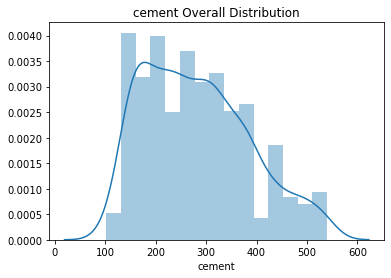

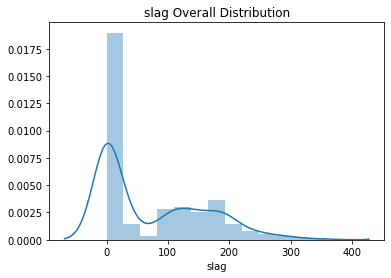

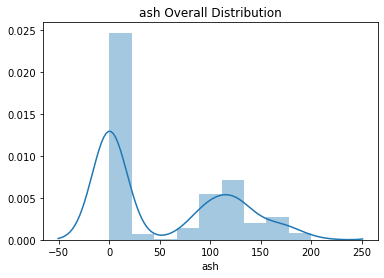

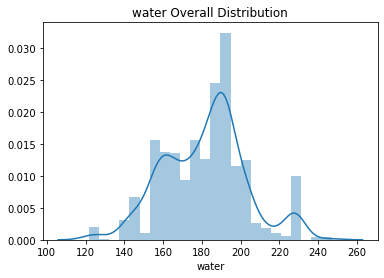

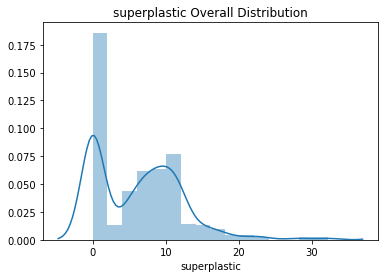

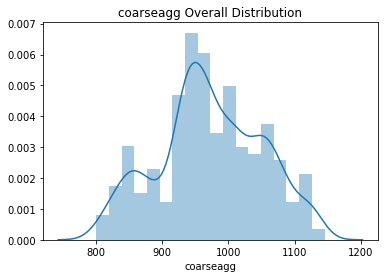

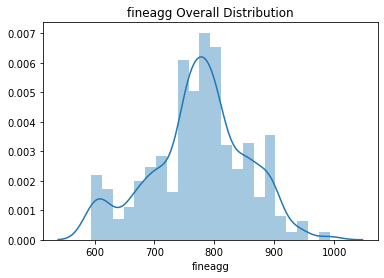

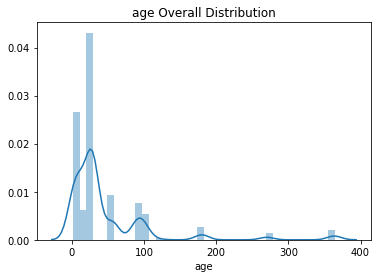

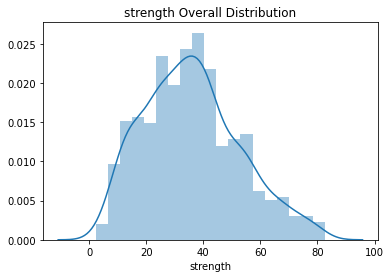

In [10]:
#Distribution of all numeric variables in the dataset (Histogram)
for column in columns:
    plt.figure()  
    sns.distplot(c_ds[column]).set_title(column + ' Overall Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'cement Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'slag Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'ash Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'water Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'superplastic Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'coarseagg Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'fineagg Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'age Boxplot Distribution')

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'strength Boxplot Distribution')

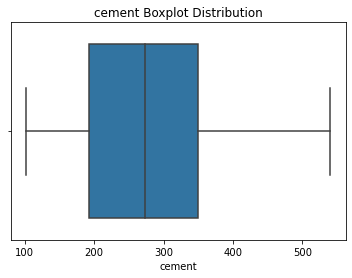

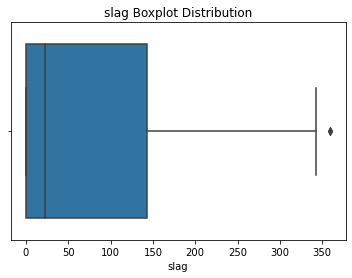

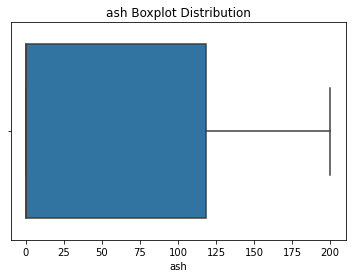

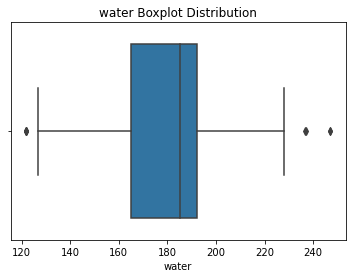

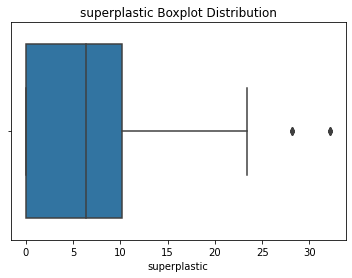

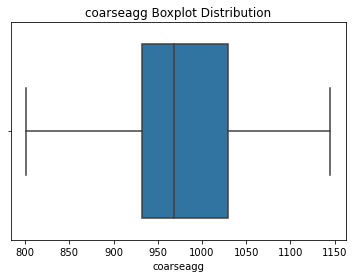

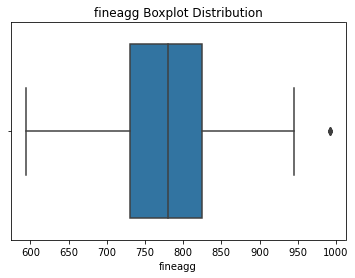

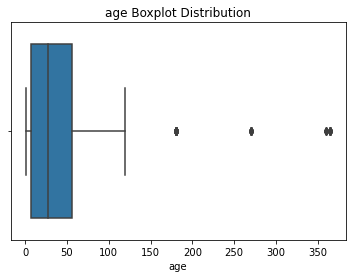

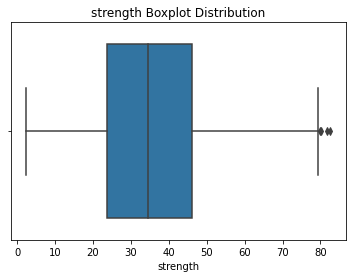

In [11]:
#Distribution and Outlier detection of all numeric variables in the dataset (Boxplot)
for column in columns:
    plt.figure()  
    sns.boxplot(c_ds[column]).set_title(column + ' Boxplot Distribution')

#### Histogram and Box Plots: Distribution of Numeric variables in the dataset

* Variables slag, ash, superplastic, age are exhibiting highly skewed to the right distributions.
* While target variable strength and other predictors, cement, water, coarseagg, and fineagg have a seemingly normal distribution 
* Variables (slag, water, superplastic,fineagg, age and strength) do have noticeable outliers on the data based on the outputs of their individual box plots and by looking at the difference between the 99th and 100th percentile values. Values that are considered outliers are capped approximately near to their 99th percentiles.

In [12]:
#Based on the estimated values near 99th percentile, we are capping 10 values to 300
len(c_ds[(c_ds['slag']>300)])
c_ds.loc[c_ds.slag > 300, 'slag'] = 300

10

In [13]:
#Based on the estimated values near 99th percentile, we are capping 12 values to 130
len(c_ds[(c_ds['water']<130)])
c_ds.loc[c_ds.water < 130, 'water'] = 130

12

In [14]:
#Based on the estimated values near 99th percentile, we are capping 4 values to 230
len(c_ds[(c_ds['water']>230)])
c_ds.loc[c_ds.water > 230, 'water'] = 230

4

In [15]:
#Based on the estimated values near 99th percentile, we are capping 10 values to 25
len(c_ds[(c_ds['superplastic']>25)])
c_ds.loc[c_ds.superplastic > 25, 'superplastic'] = 25

10

In [16]:
#Based on the estimated values near 99th percentile, we are capping 5 values to 950
len(c_ds[(c_ds['fineagg']>950)])
c_ds.loc[c_ds.fineagg > 950, 'fineagg'] = 950

5

In [17]:
#Based on the estimated values near 99th percentile, we are capping 59 values to 150
len(c_ds[(c_ds['age']>150)])
c_ds.loc[c_ds.age > 150, 'age'] = 150

59

In [18]:
#Based on the estimated values near 99th percentile, we are capping 3 values to 180
len(c_ds[(c_ds['strength']>80)])
c_ds.loc[c_ds.strength > 80, 'strength'] = 80

3

#### Bivariate Analysis

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves.

<Figure size 720x576 with 0 Axes>

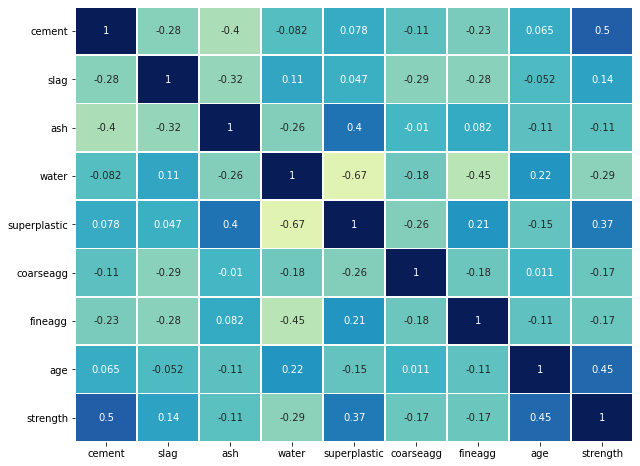

In [19]:
#Correlation Plot
plt.figure(figsize=(10,8))

sns.heatmap(c_ds.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

* There are noticeable postive correlations between age and strength, cement and strength , and superplastic and ash. And a negative correlation for superplastic and water, and water and fineagg. We may not remove these variables in the model as relationship strength might not be powerful enough to mess up our model estimates.

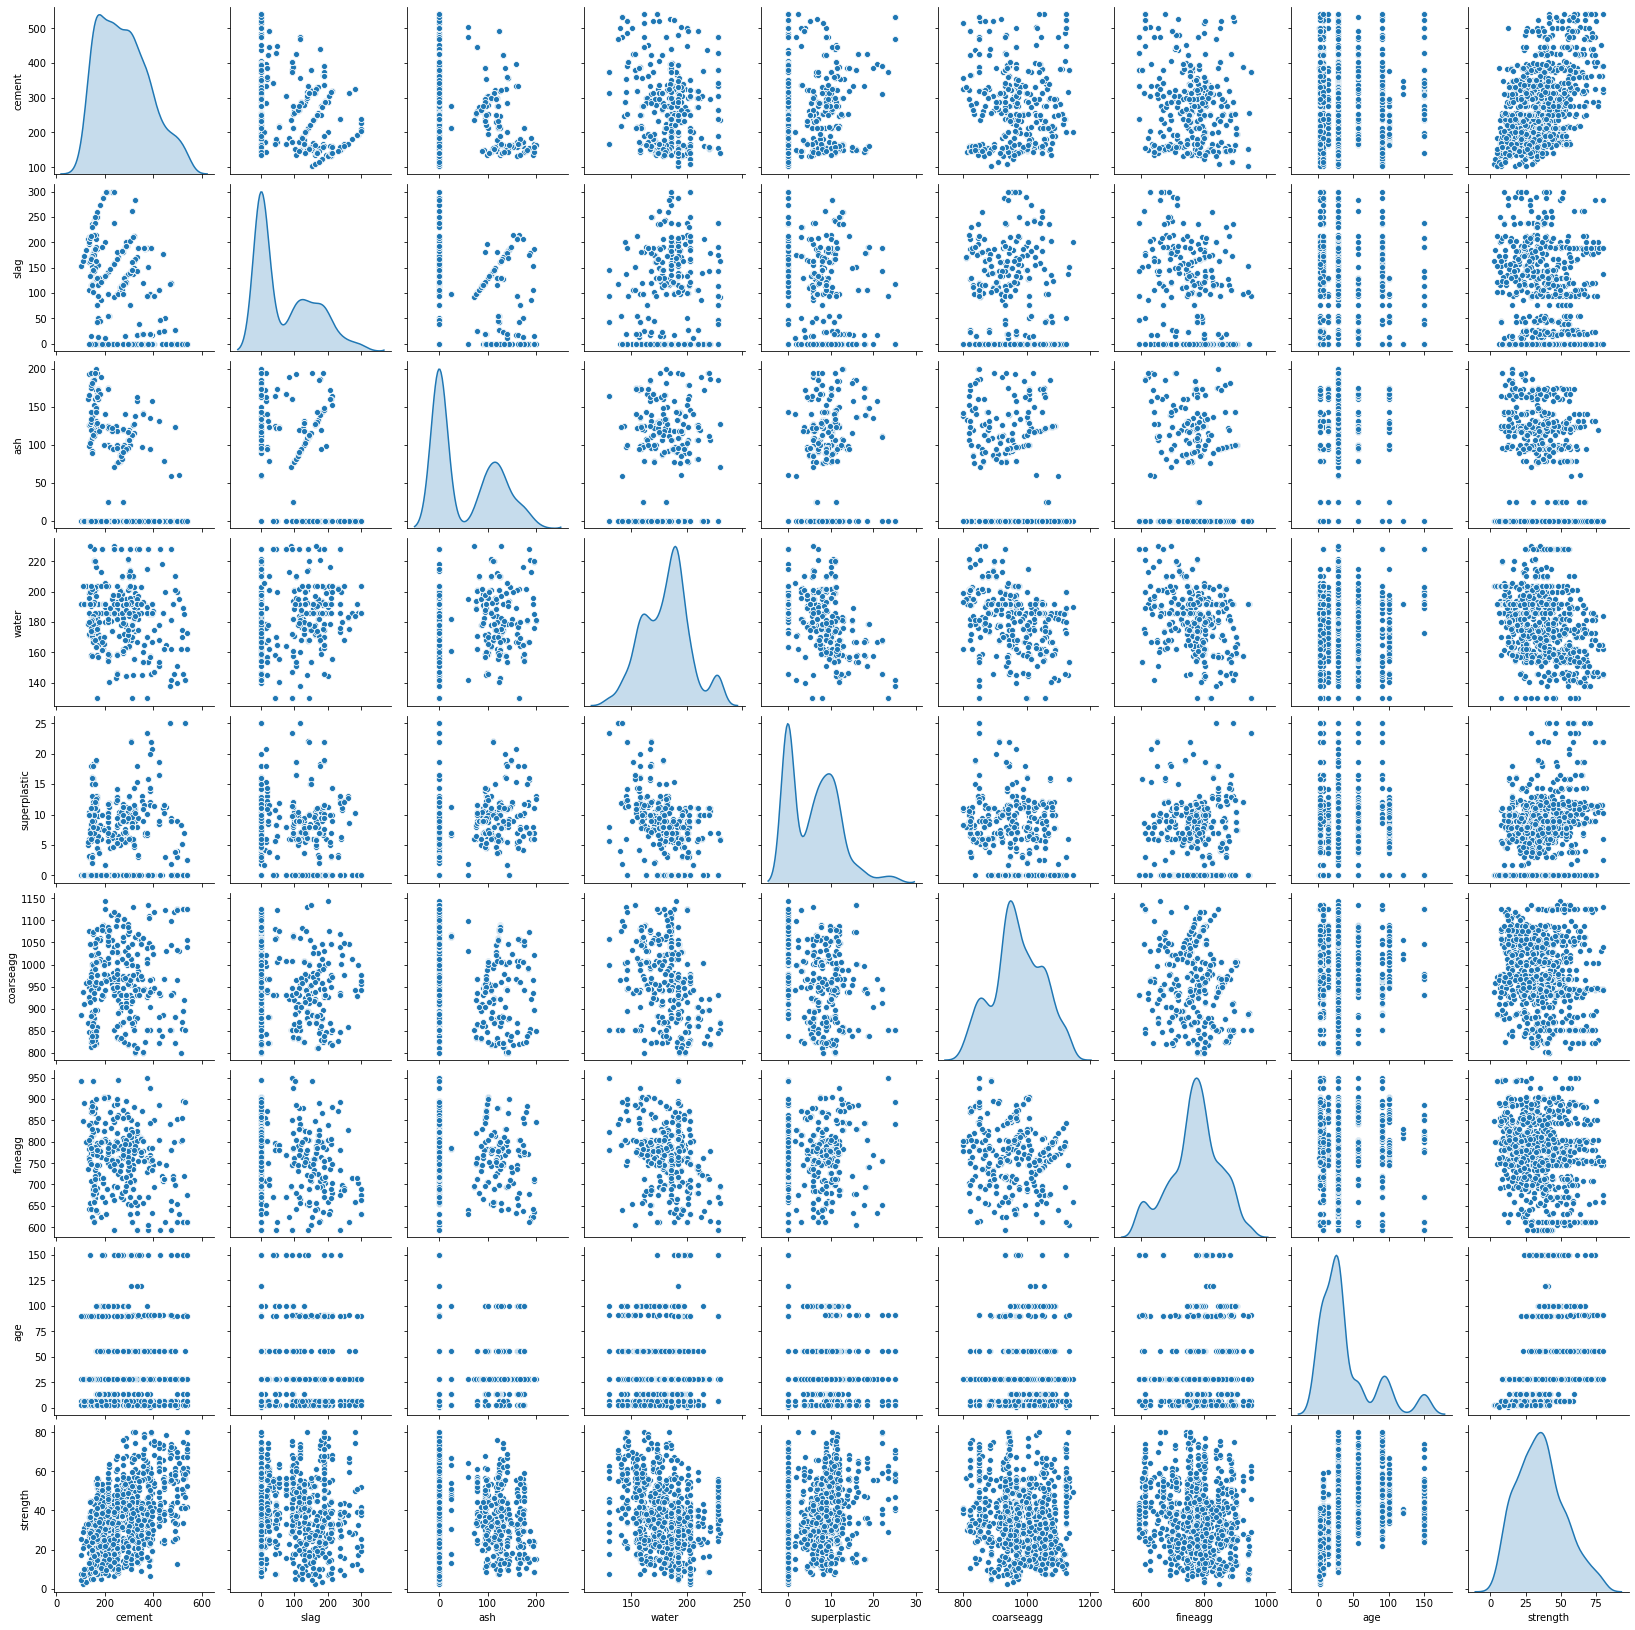

In [20]:
#Additional pairplots for all numeric independent vars
sns.pairplot(c_ds,diag_kind='kde')

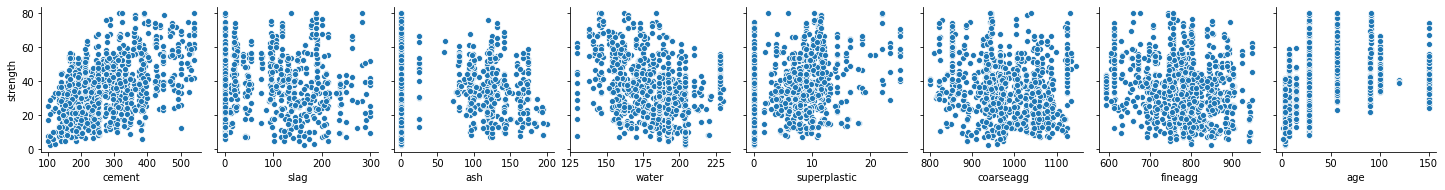

In [21]:
#Relationship of each independent variable to the target variable 'strength'
sns.pairplot(c_ds, x_vars=['cement','slag','ash','water','superplastic','coarseagg','fineagg','age'], y_vars=['strength'])

* It appears that cement has the 'strongest' positive linear relationship with the target variable. 
* Strength values are distributed fairly across all age levels.
* Coarseagg  and Fineagg seem to have weak negative linear relationships with strength.
* Other predictor variables appear to be randomly distributed across strength and do not seem to have a linear relationship with the target.

#### Feature Engineering

Produce first iteration of the model using multivariate linear regression and identify possible features to be tweaked.

In [22]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X = c_ds.drop('strength', axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y = c_ds[['strength']]

In [23]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [24]:
# Invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [25]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cement is 0.12512885210817445
The coefficient for slag is 0.10919235803049777
The coefficient for ash is 0.08947152018003664
The coefficient for water is -0.14009209986996807
The coefficient for superplastic is 0.31583310783626883
The coefficient for coarseagg is 0.019221897620567103
The coefficient for fineagg is 0.028610344567757687
The coefficient for age is 0.2276129622014564


In [26]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -38.72189845628335


In [27]:
regression_model.score(X_train, y_train)

0.7101685838093915

In [28]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
regression_model.score(X_test, y_test)

0.7196496997935575

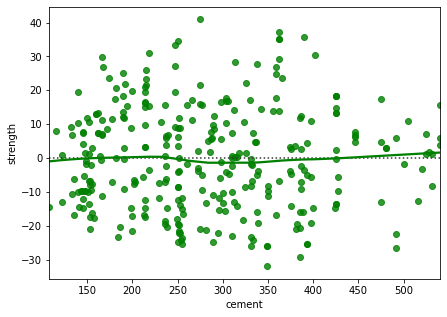

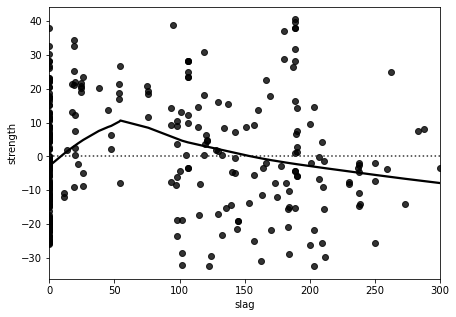

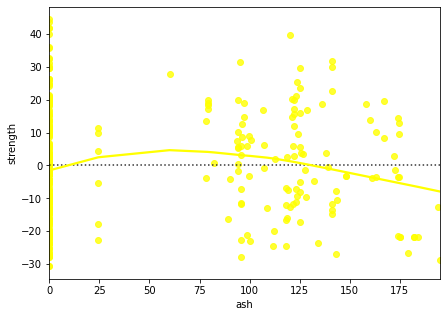

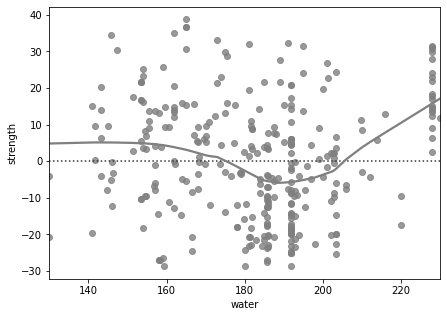

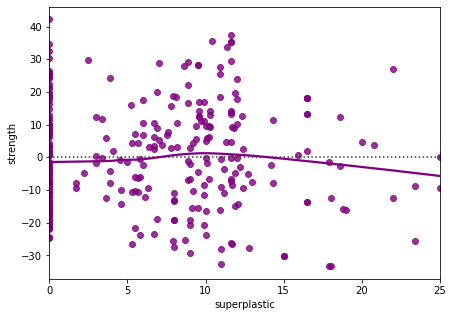

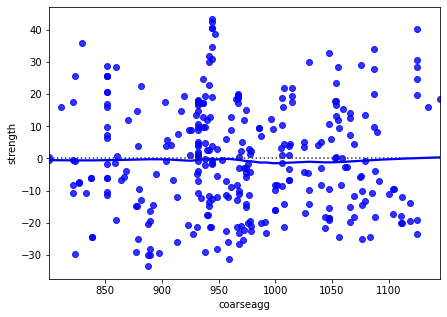

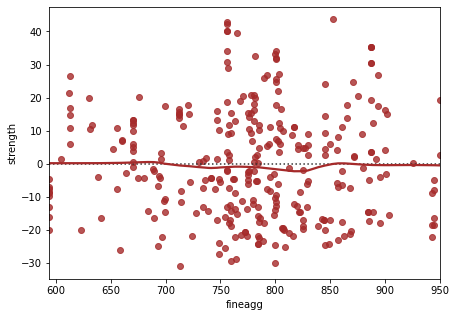

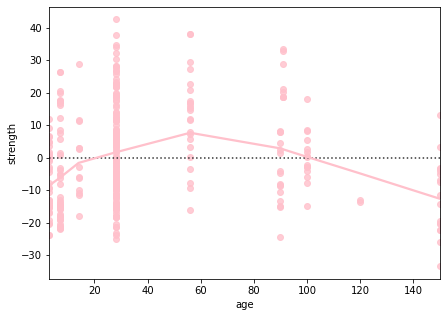

In [29]:
# Check if OLS is a good model and a linear regression is sufficient. Check the residuals for each predictor.

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['cement'], y= y_test['strength'], color='green', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['slag'], y= y_test['strength'], color='black', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['ash'], y= y_test['strength'], color='yellow', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['water'], y= y_test['strength'], color='gray', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['superplastic'], y= y_test['strength'], color='purple', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['coarseagg'], y= y_test['strength'], color='blue', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['fineagg'], y= y_test['strength'], color='brown', lowess=True )

fig = plt.figure(figsize=(7,5))
sns.residplot(x= X_test['age'], y= y_test['strength'], color='pink', lowess=True )


Residuals of each variable seem to be randomly distributed so OLS should be fine and workable. However, age has a noticeable clustered pattens for its residuals so this is a good indication that age might be needing transformations. Also, same with water but not very apparent.

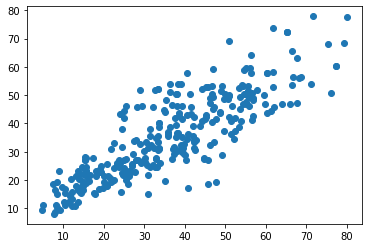

In [30]:
#Prediction shows linearity
y_pred = regression_model.predict(X_test)
plt.scatter(y_test['strength'], y_pred)

In [31]:
data_train = pd.concat([X_train, y_train], axis=1)
data_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
185,350.0,0.0,0.0,203.0,0.0,974.0,775.0,14,22.53
286,374.0,189.2,0.0,170.1,10.1,926.1,756.7,91,64.90
600,277.0,0.0,0.0,191.0,0.0,968.0,856.0,3,11.36
691,380.0,95.0,0.0,228.0,0.0,932.0,594.0,7,32.82
474,356.0,0.0,142.0,193.0,11.0,801.0,778.0,28,40.87


In [32]:
lm1 = smf.ols(formula= 'strength ~ cement+slag+ash+water+superplastic+coarseagg+fineagg+age', data = data_train).fit()
lm1.params

Intercept      -38.721898
cement           0.125129
slag             0.109192
ash              0.089472
water           -0.140092
superplastic     0.315833
coarseagg        0.019222
fineagg          0.028610
age              0.227613
dtype: float64

In [33]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     218.1
Date:                Fri, 28 Aug 2020   Prob (F-statistic):          9.18e-186
Time:                        01:59:34   Log-Likelihood:                -2599.2
No. Observations:                 721   AIC:                             5216.
Df Residuals:                     712   BIC:                             5258.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -38.7219     27.284     -1.419   

From above, we noticed that age exhibits a clustered residual pattern. We will also be checking the importance of 'age' feature so we could transform or extract another version of the variable.

In [34]:
#Make y train data into 1d array
train_data=np.array(y_train)
y_train_d = train_data.ravel()

In [35]:
# View a list of the features and their importance scores
rf = RandomForestRegressor(max_depth=2,random_state=9999)
rfm=rf.fit(X_train,y_train_d)

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 8 artists>

([<matplotlib.axis.YTick at 0x28b7ec4e8c8>,
 [Text(0, 0, 'age'),
  Text(0, 0, 'cement'),
  Text(0, 0, 'water'),
  Text(0, 0, 'superplastic'),
  Text(0, 0, 'slag'),
  Text(0, 0, 'fineagg'),
  Text(0, 0, 'coarseagg'),
  Text(0, 0, 'ash')])

Text(0.5, 0, 'Relative Importance')

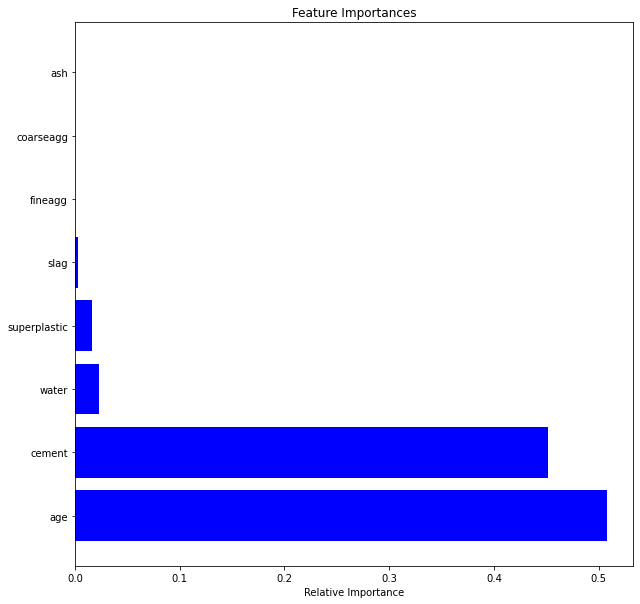

In [36]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = c_ds.columns[:]
features= a.drop('strength',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

Age is the most important feature when running the random forest regressor, we can improve lift of the model by transforming this variable.

In [37]:
#Create another feature based on age variable
c_ds['age_log']= np.log(c_ds['age'])

In [38]:
#Check if created properly
c_ds.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_log
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,3.332205
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,2.639057
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,3.332205
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,3.332205
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,3.332205


Create another iteration of linear regression based on age_log and not age variable.

In [40]:
# Copy all the predictor variables into X dataframe. Since 'strength' is dependent variable drop it
X3 = c_ds.drop({'strength','age'}, axis=1)

# Copy the 'strength' column alone into the y dataframe. This is the dependent variable
y3 = c_ds[['strength']]

In [41]:
# Split X and y into training and test set in 70:30 ratio
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.30 , random_state=1)

In [42]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model3 = LinearRegression()
regression_model3.fit(X_train3, y_train3)

LinearRegression()

In [43]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[0][idx]))

The coefficient for cement is 0.14038225212350225
The coefficient for slag is 0.11912288866986379
The coefficient for ash is 0.09655522960526308
The coefficient for water is -0.10170708889130266
The coefficient for superplastic is 0.13738858924613012
The coefficient for coarseagg is 0.03433036176190853
The coefficient for fineagg is 0.04393183479330087
The coefficient for age_log is 9.19446714471127


In [44]:
# Let us check the intercept for the model

intercept = regression_model3.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -96.38559042976223


In [45]:
regression_model3.score(X_train3, y_train3)

0.8322029673975784

In [46]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS
regression_model3.score(X_test3, y_test3)
OLS=regression_model3.score(X_test3, y_test3)

0.8209128410938501

In [47]:
#Store the metrics for each model in a dataframe for final comparison
OLS_DF = pd.DataFrame({'Method':['Linear Regression'], 'Rsquared': OLS})
OLS_DF

,Method,Rsquared
0,Linear Regression,0.820913


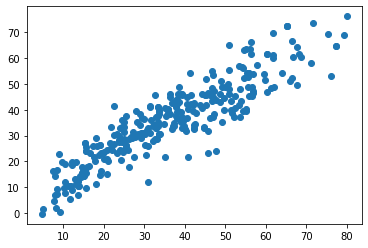

In [48]:
y_pred3 = regression_model3.predict(X_test3)
plt.scatter(y_test3['strength'], y_pred3)

Notice a significant improvement in score / Rsquared when we fitted age_log instead of the normal age value. We can also create a model using age as a categorical variable.

#### Creating the model and tuning it

Algorithms that you think will be suitable for this project. Use Kfold Cross Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics.
(at least 3 algorithms, one bagging and one boosting based algorithms has to be there).

Since we already created an OLS above, we will be creating 2 more regression type models; Lasso and Ridge.

##### Lasso Regression

In [49]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train3,y_train3)
print ("Lasso model:", (lasso.coef_))

Lasso(alpha=0.05)

Lasso model: [ 0.14019232  0.11886155  0.09631489 -0.10245203  0.13520439  0.03404605
  0.04367632  9.15491793]


In [50]:
#Train and test scores
print(lasso.score(X_train3, y_train3))
print(lasso.score(X_test3, y_test3))

0.8321952414840463
0.8209027333874553


In [51]:
LASSO= lasso.score(X_test3, y_test3)

In [52]:
#Store the metrics for each model in a dataframe for final comparison
LASSO_DF = pd.DataFrame({'Method':['Lasso Regression'], 'Rsquared': LASSO})
LASSO_DF

,Method,Rsquared
0,Lasso Regression,0.820903


##### Ridge Regression

In [53]:
ridge = Ridge(alpha=.05)
ridge.fit(X_train3,y_train3)
print ("Ridge model:", (ridge.coef_))

Ridge(alpha=0.05)

Ridge model: [[ 0.14038072  0.11912072  0.09655262 -0.10170478  0.13740791  0.03432911
   0.04393033  9.19395449]]


In [54]:
#Train and test scores
print(ridge.score(X_train3, y_train3))
print(ridge.score(X_test3, y_test3))

0.8322029662020551
0.8209123190480276


In [55]:
RIDGE= ridge.score(X_test3, y_test3)

In [56]:
#Store the metrics for each model in a dataframe for final comparison
RIDGE_DF = pd.DataFrame({'Method':['Ridge Regression'], 'Rsquared': RIDGE})
RIDGE_DF

,Method,Rsquared
0,Ridge Regression,0.820912


##### Performing Kfold Cross validations across these models

In [57]:
#Defining number of folds: 5 is sufficient since data rows are not too large
num_folds = 5

In [58]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)

In [59]:
#Defining 3 regression models
rm3=regression_model3.fit(X_train3, y_train3)
rfit = ridge.fit(X_train3,y_train3)
lfit = lasso.fit(X_train3,y_train3)

In [60]:
#Results of OLS based from 5 folds
results_rm3 = cross_val_score(rm3,X_test3, y_test3, cv=kfold)
results_rm3

array([0.8118903 , 0.81263781, 0.81323284, 0.80314774, 0.82072638])

In [61]:
#Mean score results of OLS
np.mean(abs(results_rm3))
results_rm3.std()

0.8123270154601695

0.005584194600780328

In [62]:
KF_OLS=np.mean(abs(results_rm3))
KF_OLS_DF = pd.DataFrame({'Method':['K Fold Linear Regression'], 'Rsquared': KF_OLS})
KF_OLS_DF

,Method,Rsquared
0,K Fold Linear Regression,0.812327


In [63]:
#Results of Ridge based from 5 folds
results_rfit = cross_val_score(rfit,X_test3, y_test3, cv=kfold)
results_rfit

array([0.8118861 , 0.81262497, 0.81324009, 0.80314618, 0.82072825])

In [64]:
#Mean score results of Ridge
np.mean(abs(results_rfit))
results_rfit.std()

0.8123251182467559

0.005585435424112516

In [65]:
KF_R=np.mean(abs(results_rfit))
KF_R_DF = pd.DataFrame({'Method':['K Fold Ridge Regression'], 'Rsquared': KF_R})
KF_R_DF

,Method,Rsquared
0,K Fold Ridge Regression,0.812325


In [66]:
#Results of Lasso based from 5 folds
results_lfit = cross_val_score(lfit,X_test3, y_test3, cv=kfold)
results_lfit

array([0.81188123, 0.81259973, 0.81360745, 0.80317492, 0.82070904])

In [67]:
#Mean score Lasso of Ridge
np.mean(abs(results_lfit))
results_lfit.std()

0.812394473201746

0.005584069322413961

In [68]:
KF_L=np.mean(abs(results_lfit))
KF_L_DF = pd.DataFrame({'Method':['K Fold Lasso Regression'], 'Rsquared': KF_L})
KF_L_DF

,Method,Rsquared
0,K Fold Lasso Regression,0.812394


##### Bagging using 3 regression models

In [69]:
#Transform y values into 1d array
a=np.array(y_train3)
b=a.ravel()

OLS Regression

In [70]:
regr = BaggingRegressor(base_estimator=LinearRegression(),n_estimators=10, random_state=123)

In [71]:
regr =regr.fit(X_train3,b)

In [72]:
y_predict_regr = regr.predict(X_test3)
print(regr.score(X_test3,y_test3))

0.8203873780035434


In [73]:
BAG_OLS=regr.score(X_test3,y_test3)
BAG_OLS_DF = pd.DataFrame({'Method':['Bagging Linear Regression'], 'Rsquared': BAG_OLS})
BAG_OLS_DF

,Method,Rsquared
0,Bagging Linear Regression,0.820387


Lasso Regression

In [74]:
regr_lasso = BaggingRegressor(base_estimator=Lasso(),n_estimators=10, random_state=123)
regr_lasso =regr_lasso.fit(X_train3,b)

In [75]:
y_predict_regr_lasso = regr_lasso.predict(X_test3)
print(regr_lasso.score(X_test3 , y_test3))

0.8172094869938499


In [76]:
BAG_L=regr_lasso.score(X_test3,y_test3)
BAG_L_DF = pd.DataFrame({'Method':['Bagging Lasso Regression'], 'Rsquared': BAG_L})
BAG_L_DF

,Method,Rsquared
0,Bagging Lasso Regression,0.817209


Ridge Regression

In [77]:
regr_ridge = BaggingRegressor(base_estimator=Ridge(),n_estimators=10, random_state=123)
regr_ridge =regr_ridge.fit(X_train3,b)

In [78]:
y_predict_regr_ridge = regr_ridge.predict(X_test3)

print(regr_ridge.score(X_test3 , y_test3))

0.8203699978774164


In [79]:
BAG_R=regr_ridge.score(X_test3,y_test3)
BAG_R_DF = pd.DataFrame({'Method':['Bagging Ridge Regression'], 'Rsquared': BAG_R})
BAG_R_DF

,Method,Rsquared
0,Bagging Ridge Regression,0.82037


##### Bootstrap using 3 regression models

In [80]:
# Number of iterations for bootstrapping
bootstrap_iteration = 5
rsquared_lm = []
rsquared_ridge = []
rsquared_lasso = []

OLS Regression

In [81]:
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train3, y_train3)
    regression_model3.fit(X_, y_)
    y_pred3 = regression_model3.predict(X_test3)
    
    acc = regression_model3.score(X_test3, y_test3)
    rsquared_lm.append(acc)

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [82]:
rsquared_lm
rsquared_lm = np.array(rsquared_lm)
rsquared_lm.mean()
rsquared_lm.std()

[0.8158787197377005,
 0.821119411749996,
 0.8182901039974861,
 0.8213081849603319,
 0.8172121729309814]

0.8187617186752991

0.0021437538323015866

In [83]:
BST_OLS=rsquared_lm.mean()
BST_OLS_DF = pd.DataFrame({'Method':['Boosting Linear Regression'], 'Rsquared': BST_OLS})
BST_OLS_DF

,Method,Rsquared
0,Boosting Linear Regression,0.818762


Ridge Regression

In [84]:
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train3, y_train3)
    ridge.fit(X_, y_)
    y_pred3_ridge = ridge.predict(X_test3)
    
    acc_rid = ridge.score(X_test3, y_test3)
    rsquared_ridge.append(acc_rid)

Ridge(alpha=0.05)

Ridge(alpha=0.05)

Ridge(alpha=0.05)

Ridge(alpha=0.05)

Ridge(alpha=0.05)

In [85]:
rsquared_ridge
rsquared_ridge = np.array(rsquared_ridge)
rsquared_ridge.mean()
rsquared_ridge.std()

[0.8165947065662837,
 0.818482314102043,
 0.8172029918289656,
 0.8129083728366773,
 0.8227388660765205]

0.8175854502820978

0.003173797727360406

In [86]:
BST_R=rsquared_ridge.mean()
BST_R_DF = pd.DataFrame({'Method':['Boosting Ridge Regression'], 'Rsquared': BST_R})
BST_R_DF

,Method,Rsquared
0,Boosting Ridge Regression,0.817585


Lasso Regression

In [87]:
for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train3, y_train3)
    lasso.fit(X_, y_)
    y_pred3_lasso = lasso.predict(X_test3)
    
    acc_lasso = lasso.score(X_test3, y_test3)
    rsquared_lasso.append(acc_lasso)

Lasso(alpha=0.05)

Lasso(alpha=0.05)

Lasso(alpha=0.05)

Lasso(alpha=0.05)

Lasso(alpha=0.05)

In [88]:
rsquared_lasso
rsquared_lasso = np.array(rsquared_lasso)
rsquared_lasso.mean()
rsquared_lasso.std()

[0.8177756984277124,
 0.8111192173197121,
 0.8184793029472743,
 0.8114430378999008,
 0.8190042411792542]

0.8155642995547707

0.003520348898553766

In [89]:
BST_L=rsquared_lasso.mean()
BST_L_DF = pd.DataFrame({'Method':['Boosting Lasso Regression'], 'Rsquared': BST_L})
BST_L_DF

,Method,Rsquared
0,Boosting Lasso Regression,0.815564


In [90]:
OverallResults = pd.concat([OLS_DF,LASSO_DF,RIDGE_DF,KF_OLS_DF,KF_L_DF,KF_R_DF,BAG_OLS_DF,BAG_L_DF,BAG_R_DF,BST_OLS_DF,BST_L_DF,BST_R_DF])
OverallResults

,Method,Rsquared
0,Linear Regression,0.820913
0,Lasso Regression,0.820903
0,Ridge Regression,0.820912
0,K Fold Linear Regression,0.812327
0,K Fold Lasso Regression,0.812394
0,K Fold Ridge Regression,0.812325
0,Bagging Linear Regression,0.820387
0,Bagging Lasso Regression,0.817209
0,Bagging Ridge Regression,0.820370
0,Boosting Linear Regression,0.818762


Based on comparing Rsquared metrics both in train and test data and across multiple sampling algorithms done, a simple multivariate linear regression is still the best in predicting target (concrete strength) based on higher intepretability metrics, R squared.

##### Tuning hyperparameters in Ridge via GridSearchCV and RandomSearchCV

Techniques employed to squeeze that extra performance out of the model
without making it over fit. Use Grid Search or Random Search on any of the two
models used above. Make a DataFrame to compare models after hyperparameter
tuning and their metrics as above.

##### Ridge Regression

In [91]:
#Parameters I wanna tweak
parameters = {'alpha': [0.5,1.0, 1.5, 2],
              'fit_intercept': [True,False],
              'normalize': [True,False],
              'tol':[0.001,0.01,.1],
              'solver':['auto', 'svd','cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}              

In [92]:
clf = GridSearchCV(Ridge(), parameters, cv = 5, verbose = 2, n_jobs= 4)
clf.fit(X_train3, y_train3)

clf.best_params_

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 1680 out of 1680 | elapsed:    8.6s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=4,
             param_grid={'alpha': [0.5, 1.0, 1.5, 2],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga'],
                         'tol': [0.001, 0.01, 0.1]},
             verbose=2)

{'alpha': 2,
 'fit_intercept': True,
 'normalize': False,
 'solver': 'sparse_cg',
 'tol': 0.001}

In [93]:
GS_Ridge = Ridge(fit_intercept=True,normalize=False, alpha=2,solver='sparse_cg', tol=0.001, random_state=123)

In [94]:
GS_Ridge_train_score = cross_val_score(GS_Ridge, X_train3, y_train3, cv = 5).mean()
GS_Ridge_test_score = cross_val_score(GS_Ridge, X_test3, y_test3, cv = 5).mean()
GS_Ridge_train_score
GS_Ridge_test_score

0.8275382866322001

0.8127012494374526

In [95]:
GS_Ridge_DF = pd.DataFrame({'Method':['Grid Search'], 'Model': ['Ridge Regression'], 'Train RSquared': GS_Ridge_train_score,
                           'Test RSquared': GS_Ridge_test_score})
GS_Ridge_DF

,Method,Model,Train RSquared,Test RSquared
0,Grid Search,Ridge Regression,0.827538,0.812701


In [96]:
# run randomized search
samples = 5  # number of random samples 
randomCV = RandomizedSearchCV(Ridge(), param_distributions=parameters, n_iter=samples) #default cv = 3

In [97]:
randomCV.fit(X_train3, y_train3)
print(randomCV.best_params_)

RandomizedSearchCV(estimator=Ridge(), n_iter=5,
                   param_distributions={'alpha': [0.5, 1.0, 1.5, 2],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga'],
                                        'tol': [0.001, 0.01, 0.1]})

{'tol': 0.001, 'solver': 'svd', 'normalize': True, 'fit_intercept': False, 'alpha': 2}


In [98]:
RS_Ridge = Ridge(alpha=2,fit_intercept=False,normalize=False,solver='cholesky', tol=0.01, random_state=123)

In [99]:
RS_Ridge_train_score = cross_val_score(RS_Ridge, X_train3, y_train3, cv = 5).mean()
RS_Ridge_test_score = cross_val_score(RS_Ridge, X_test3, y_test3, cv = 5).mean()
RS_Ridge_train_score
RS_Ridge_test_score

0.8227380873415499

0.8160963106210947

In [100]:
RS_Ridge_DF = pd.DataFrame({'Method':['Randomized Search'], 'Model': ['Ridge Regression'], 'Train RSquared': RS_Ridge_train_score,
                           'Test RSquared': RS_Ridge_test_score})
RS_Ridge_DF

,Method,Model,Train RSquared,Test RSquared
0,Randomized Search,Ridge Regression,0.822738,0.816096


#### Lasso Regression

In [102]:
#Parameters I wanna tweak
parameters_lasso = {'alpha': [0.5,1.0, 1.5, 2],
                    'fit_intercept': [True,False],
                    'normalize': [True,False],
                    'tol':[0.001,0.01,.1],
                    'warm_start': [True,False],
                    'positive': [True,False],
                    'selection':['cyclic', 'random']}              

In [103]:
clf_lasso = GridSearchCV(Lasso(), parameters_lasso, cv = 5, verbose = 2, n_jobs= 4)
clf_lasso.fit(X_train3, y_train3)

clf_lasso.best_params_

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 1920 out of 1920 | elapsed:    5.2s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=4,
             param_grid={'alpha': [0.5, 1.0, 1.5, 2],
                         'fit_intercept': [True, False],
                         'normalize': [True, False], 'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.001, 0.01, 0.1],
                         'warm_start': [True, False]},
             verbose=2)

{'alpha': 0.5,
 'fit_intercept': True,
 'normalize': False,
 'positive': False,
 'selection': 'cyclic',
 'tol': 0.001,
 'warm_start': True}

In [104]:
GS_Lasso= Lasso(fit_intercept=True,normalize=False, alpha=0.5,positive=False, selection='cyclic',tol=0.001, warm_start=True, random_state=123)

In [105]:
GS_Lasso_train_score = cross_val_score(GS_Lasso, X_train3, y_train3, cv = 5).mean()
GS_Lasso_test_score = cross_val_score(GS_Lasso, X_test3, y_test3, cv = 5).mean()
GS_Lasso_train_score
GS_Lasso_test_score

0.8268898966115701

0.8136767967738956

In [106]:
GS_Lasso_DF = pd.DataFrame({'Method':['Grid Search'], 'Model': ['Lasso Regression'], 'Train RSquared': GS_Lasso_train_score,
                           'Test RSquared': GS_Lasso_test_score})
GS_Lasso_DF

,Method,Model,Train RSquared,Test RSquared
0,Grid Search,Lasso Regression,0.82689,0.813677


In [107]:
# run randomized search
samples = 5  # number of random samples 
randomCV_lasso = RandomizedSearchCV(Lasso(), param_distributions=parameters_lasso, n_iter=samples) 

In [108]:
randomCV_lasso.fit(X_train3, y_train3)
print(randomCV_lasso.best_params_)

RandomizedSearchCV(estimator=Lasso(), n_iter=5,
                   param_distributions={'alpha': [0.5, 1.0, 1.5, 2],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False],
                                        'positive': [True, False],
                                        'selection': ['cyclic', 'random'],
                                        'tol': [0.001, 0.01, 0.1],
                                        'warm_start': [True, False]})

{'warm_start': True, 'tol': 0.01, 'selection': 'random', 'positive': True, 'normalize': False, 'fit_intercept': True, 'alpha': 1.5}


In [109]:
RS_Lasso= Lasso(fit_intercept=False,normalize=True, alpha=1.0,positive=False, selection='random',tol=0.01, warm_start=True, random_state=123)

In [110]:
RS_Lasso_train_score = cross_val_score(RS_Lasso, X_train3, y_train3, cv = 5).mean()
RS_Lasso_test_score = cross_val_score(RS_Lasso, X_test3, y_test3, cv = 5).mean()
RS_Lasso_train_score
RS_Lasso_test_score

0.8202688941353014

0.8146135134703814

In [111]:
RS_Lasso_DF = pd.DataFrame({'Method':['Randomized Search'], 'Model': ['Lasso Regression'], 'Train RSquared': RS_Lasso_train_score,
                           'Test RSquared': RS_Lasso_test_score})
RS_Lasso_DF

,Method,Model,Train RSquared,Test RSquared
0,Randomized Search,Lasso Regression,0.820269,0.814614


In [112]:
RSGS = pd.concat([GS_Ridge_DF, RS_Ridge_DF, GS_Lasso_DF,RS_Lasso_DF])
RSGS

,Method,Model,Train RSquared,Test RSquared
0,Grid Search,Ridge Regression,0.827538,0.812701
0,Randomized Search,Ridge Regression,0.822738,0.816096
0,Grid Search,Lasso Regression,0.826890,0.813677
0,Randomized Search,Lasso Regression,0.820269,0.814614


From the above models, we distinguished that linear regression is the best appropriate model based on Rsquared metrics. while, by looking into more details of ridge and lasso, comparing these two and trying to tweak parameters for better estimates, it seems that GridSearch method yields better Rsquared than Randomized Search methodology for Ridge Regression. Also, between Ridge and Lasso, it is seen that Ridge performs better having higher Rsquared for train and test dataset across both methods. Therefore, Linear Regression is the best , followed by Ridge and lastly Lasso for this dataset.

Also, model tells us that increasing each variable in the model will increase the concrete strength except water. Increasing water will lessen the strength of the concrete which makes sense.